✅ Accuracy: 0.9006488240064883

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.74      0.56      0.64       382

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466


🧩 Confusion Matrix:
 [[2007   77]
 [ 168  214]]


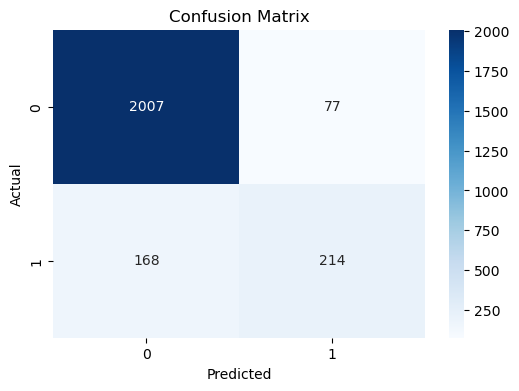

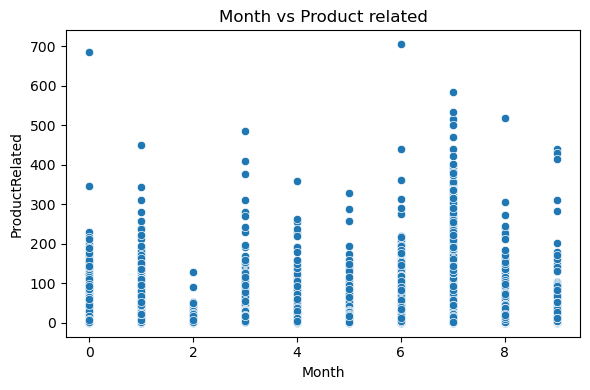

✅ Model saved successfully.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Show top 5 rows
df.head()

# Encode categorical features
df['Month'] = LabelEncoder().fit_transform(df['Month'])
df['VisitorType'] = LabelEncoder().fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Features and target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Build Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Scatter plot: Year vs Selling Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Month', y='ProductRelated', data=df)
plt.title('Month vs Product related')
plt.tight_layout()
plt.show()

import pickle

with open('C:/Users/HP/Desktop/summer class/project/shopper_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved successfully.")